In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# This is the data file with diagnosis info (anonymized)
diagnosis = pd.read_csv('data/ppmi-2018-08-28/Prodromal_Diagnostic_Questionnaire.csv').set_index('PATNO')
diagnosis.head()

,REC_ID,F_STATUS,EVENT_ID,PAG_NAME,PRIMDIAG,OTHNEURO,PSLVL2,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
PATNO,,,,,,,,,,,
10362,408770801,V,SC,PRODDIAG,17,NaN,4,08/2013,2013-08-23 11:37:07.0,NaN,08/2013
10405,605736601,V,SC,PRODDIAG,17,NaN,5,12/2016,2016-12-06 12:45:38.0,NaN,12/2016
10496,410987801,V,SC,PRODDIAG,23,NaN,5,09/2013,2013-09-05 11:40:13.0,NaN,09/2013
10606,409586301,S,SC,PRODDIAG,17,NaN,4,09/2013,2015-06-26 08:19:21.0,NaN,03/2015
10662,448326801,V,SC,PRODDIAG,17,NaN,5,07/2014,2014-07-16 08:08:30.0,NaN,07/2014


In [3]:
# This is the data file with diagnosis info (anonymized)
codes = pd.read_csv('data/ppmi-2018-08-28/Code_List.csv')
codes.head()

,PAG_NAME,ITM_NAME,CDL_NAME,CODE,DECODE,LAST_UPDATE
0,AE,AEFLUP,YN,0,No,2010-12-06 07:13:10.0
1,AE,AEFLUP,YN,1,Yes,2010-12-06 07:13:10.0
2,AE,AEOUTCOM,AEOUTCOM,1,recovered,2010-12-06 07:13:10.0
3,AE,AEOUTCOM,AEOUTCOM,2,under treatment / observation,2010-12-06 07:13:10.0
4,AE,AEOUTCOM,AEOUTCOM,3,change in AE characteristic,2010-12-06 07:13:10.0


In [4]:
# Find all primary diagnosis codes and remove duplicates
codes = codes[codes['ITM_NAME']=='PRIMDIAG'][['CODE','DECODE']].groupby('CODE').first()
codes

,DECODE
CODE,
01,Idiopathic PD
02,Alzheimer's disease
03,Chromosome-17 frontotemporal dementia
04,Corticobasal degeneration
05,Dementia with Lewy bodies
06,Dopa-responsive dystonia
07,Essential tremor
08,Hemiparkinson/hemiatrophy syndrome
09,Juv. autosomal recessive parkinsonism


In [5]:
# Replace the numeric code in the diagnosis table with the text description above.
diagnosis['PRIMDIAG'] = diagnosis['PRIMDIAG'].map(lambda x:codes.loc['%.2d'%x,'DECODE'])

In [6]:
# This is the data file with smell test info
upsit = pd.read_csv('data/ppmi-2018-08-28/Olfactory_UPSIT.csv').set_index('SUBJECT_ID')
upsit.head()

,PROTOCOL_ID,COMPLT_DATE,SCENT_10_RESPONSE,SCENT_09_RESPONSE,SCENT_08_RESPONSE,SCENT_07_RESPONSE,SCENT_06_RESPONSE,SCENT_05_RESPONSE,SCENT_04_RESPONSE,SCENT_03_RESPONSE,...,SCENT_38_CORRECT,SCENT_37_CORRECT,SCENT_36_CORRECT,SCENT_35_CORRECT,SCENT_34_CORRECT,SCENT_33_CORRECT,SCENT_32_CORRECT,SCENT_31_CORRECT,TOTAL_CORRECT,UPSIIT_PRCNTGE
SUBJECT_ID,,,,,,,,,,,,,,,,,,,,,
90000,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,1,0,1,1,1,1,1,38,98
90001,P-PPMI Cohort,04/2013,2,3,2,1,2,3,4,4,...,1,0,1,1,0,1,0,1,30,36
90002,P-PPMI Cohort,03/2013,2,3,2,1,2,1,4,4,...,1,1,1,1,0,1,1,1,28,36
90003,P-PPMI Cohort,04/2013,3,1,1,4,2,4,3,2,...,0,0,0,0,0,0,0,0,8,0
90004,P-PPMI Cohort,04/2013,1,3,2,1,2,3,4,4,...,1,1,0,1,1,1,0,1,32,75


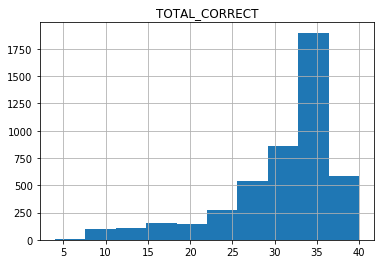

In [7]:
# Here is a histogram of total correct out of 40 for all of the subjects
upsit.hist('TOTAL_CORRECT');

In [8]:
# Merge the two tables using an inner join (only keep indices i.e. patient IDs that exist in both tables)
joined = upsit.join(diagnosis, how='inner')
print('There are %d patients common to both tables.' % joined.shape[0])

There are 407 patients common to both tables.


In [9]:
# Here is a break-down of the patient diagnoses (for all patients we have UPSIT data and diagnoses for).
joined['PRIMDIAG'].value_counts()

Prodromal non-motor PD                      215
No PD nor other neurological disorder       119
Prodromal motor PD                           35
Idiopathic PD                                33
Other neurological disorder(s) (specify)      2
Essential tremor                              2
Progressive supranuclear palsy                1
Name: PRIMDIAG, dtype: int64

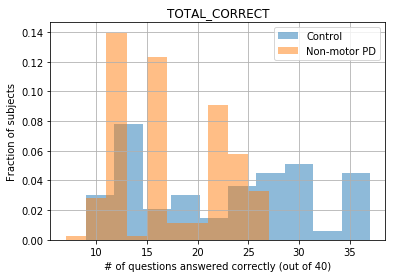

In [10]:
# Here are histograms of (non-motor) PD and controls.  
# You can see that the distributions overlap, but PD usually has worse smell.  
pro_nm_pd = joined[joined['PRIMDIAG']=='Prodromal non-motor PD']
control = joined[joined['PRIMDIAG']=='No PD nor other neurological disorder']
ax = control.hist('TOTAL_CORRECT', normed=True, alpha=0.5, label='Control');
pro_nm_pd.hist('TOTAL_CORRECT', ax=ax, normed=True, alpha=0.5, label='Non-motor PD');
plt.legend()
plt.xlabel('# of questions answered correctly (out of 40)')
plt.ylabel('Fraction of subjects');

In [11]:
# Here are all the columns in the joined table.  
# You can see that there are two columns for each of the 40 questions, one for what the response was, 
# and one for whether it is correct.  
# We should plan to try to predict the eventual diagnosis from this information.
# Eventually we want to incorporate time, so that we can predict future (years later) diagnoses
# from current UPSIT tests.  
list(joined)

['PROTOCOL_ID',
 'COMPLT_DATE',
 'SCENT_10_RESPONSE',
 'SCENT_09_RESPONSE',
 'SCENT_08_RESPONSE',
 'SCENT_07_RESPONSE',
 'SCENT_06_RESPONSE',
 'SCENT_05_RESPONSE',
 'SCENT_04_RESPONSE',
 'SCENT_03_RESPONSE',
 'SCENT_02_RESPONSE',
 'SCENT_01_RESPONSE',
 'SCENT_20_RESPONSE',
 'SCENT_19_RESPONSE',
 'SCENT_18_RESPONSE',
 'SCENT_17_RESPONSE',
 'SCENT_16_RESPONSE',
 'SCENT_15_RESPONSE',
 'SCENT_14_RESPONSE',
 'SCENT_13_RESPONSE',
 'SCENT_12_RESPONSE',
 'SCENT_11_RESPONSE',
 'SCENT_30_RESPONSE',
 'SCENT_29_RESPONSE',
 'SCENT_28_RESPONSE',
 'SCENT_27_RESPONSE',
 'SCENT_26_RESPONSE',
 'SCENT_25_RESPONSE',
 'SCENT_24_RESPONSE',
 'SCENT_23_RESPONSE',
 'SCENT_22_RESPONSE',
 'SCENT_21_RESPONSE',
 'SCENT_40_RESPONSE',
 'SCENT_39_RESPONSE',
 'SCENT_38_RESPONSE',
 'SCENT_37_RESPONSE',
 'SCENT_36_RESPONSE',
 'SCENT_35_RESPONSE',
 'SCENT_34_RESPONSE',
 'SCENT_33_RESPONSE',
 'SCENT_32_RESPONSE',
 'SCENT_31_RESPONSE',
 'SCENT_10_CORRECT',
 'SCENT_09_CORRECT',
 'SCENT_08_CORRECT',
 'SCENT_07_CORRECT',
 'SC